In [1]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv("./data/cleaned_data_with2.csv",index_col=0)

df.head()

,Price,city,History,Millage,Ratings,Year,Make,Model,Transmission,Age
0,4965000.0,Abia,foreign,149232.0,4.7,2015.0,Honda,Accord,Automatic,5.0
1,1280000.0,Accra,local,145078.0,4.4,2005.0,Toyota,Corolla,Automatic,15.0
2,1280000.0,Accra,local,91691.0,4.6,2008.0,Toyota,Corolla,Automatic,12.0
3,1567500.0,Lagos,local,234797.0,4.5,2004.0,Toyota,Corolla,Automatic,16.0
4,6065000.0,Lagos,foreign,145678.0,4.8,2013.0,Hyundai,Azera,Automatic,7.0


### Data Preparation

In [3]:
df['Price'] = df['Price']/1000000 #reduce the Price values

In [4]:
#drop the Year column
df = df.drop(['Year'],axis=1)

In [5]:
df.shape

(17227, 9)

In [6]:
df[df.Price <= 0]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
599,0.0,Lagos,foreign,10000.0,2.0,Toyota,RAV 4,Automatic,12.0
606,0.0,Lagos,foreign,9856.0,2.0,Honda,CR-V,Automatic,12.0
617,0.0,Lagos,foreign,0.0,2.0,Ford,Explorer,Automatic,4.0
618,0.0,Rivers,foreign,98000.0,2.0,Honda,CR-V,Automatic,12.0
621,0.0,Lagos,foreign,125425.0,2.0,Toyota,Camry,Automatic,12.0
...,...,...,...,...,...,...,...,...,...
14176,0.0,Lagos,foreign,92134.0,0.0,Mazda,Tribute,Manual,12.0
14177,0.0,Lagos,foreign,21344.0,0.0,Toyota,Corolla,Manual,14.0
14181,0.0,Lagos,foreign,153063.0,0.0,Toyota,Camry,Manual,23.0
14188,0.0,Lagos,foreign,0.0,0.0,Mercedes-Benz,E 350,Manual,7.0


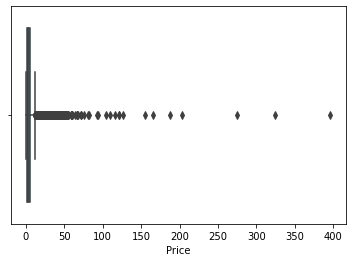

In [7]:
#find outliers!
sns.boxplot(x=df['Price'])

In [8]:
#check for outliers size

df[df.Price > 15]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
32,30.265,Lagos,foreign,76794.0,4.9,Lexus,LX 570,Automatic,3.0
52,23.115,Lagos,foreign,14464.0,5.0,Lexus,RX 350,Automatic,1.0
53,49.515,Lagos,foreign,14855.0,5.0,Land,Rover Range Rover Velar,Automatic,2.0
61,19.265,Lagos,foreign,19444.0,5.0,Lexus,RX 350,Automatic,4.0
128,55.015,Lagos,foreign,18297.0,4.7,Mercedes-Benz,G 63 AMG,Automatic,4.0
...,...,...,...,...,...,...,...,...,...
17439,36.000,Lagos,foreign,49987.0,3.0,Rover,Range Rover Vogue,Automatic,12.0
17442,29.000,Lagos,foreign,23570.0,2.0,Land,Rover Range Rover Sport,Automatic,12.0
17443,16.000,Lagos,foreign,3931.0,1.0,Toyota,Camry,Automatic,12.0
17457,16.500,Lagos,foreign,89582.0,3.0,Lexus,Lx,Automatic,12.0


In [9]:
#drop all columns where Price is zero and greater than 50(million)
df = df.drop(df[df.Price > 15].index)

df = df.drop(df[df.Price <= 0].index)

In [10]:
df.shape

(13289, 9)

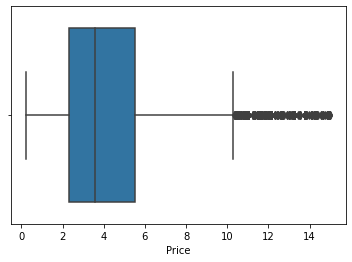

In [11]:
#find outliers!
sns.boxplot(x=df['Price'])

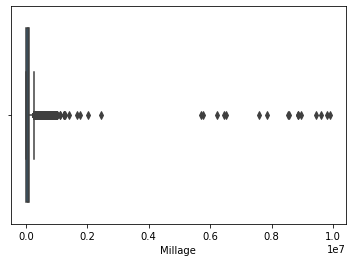

In [12]:
#check out the Millage column
sns.boxplot(x=df['Millage'])

In [13]:
#check for outliers size

df[df.Millage > 200000].shape

(1044, 9)

In [14]:
#drop all columns with Millage more than four hundred thousand km
df = df.drop(df[df.Millage > 200000].index)

In [15]:
df.shape

(12245, 9)

In [16]:
#split the data
X = df.drop(['Price'], axis=1)
y = df['Price']  #target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
X_train.describe()

,Millage,Ratings,Age
count,9183.000000,9183.000000,9183.000000
mean,51832.499292,2.378722,11.386366
std,54417.252163,0.965044,3.606203
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,9.000000
50%,48000.000000,2.000000,12.000000
75%,87449.000000,2.000000,13.000000
max,200000.000000,5.000000,50.000000


In [17]:
#to display results
results = X_test

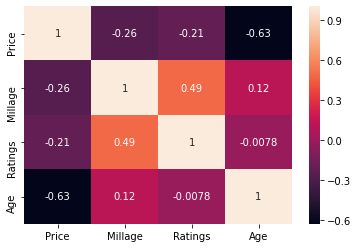

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm_cols = ['Millage','Ratings','Age']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train[norm_cols])

# transform training data
X_train.loc[:,norm_cols] = norm.transform(X_train[norm_cols])

# transform testing data
X_test.loc[:,norm_cols] = norm.transform(X_test[norm_cols])

In [20]:
#transform training data
#y_train=(y_train-y_train.mean())/y_train.std()

#y_test = norm_y.transform(y_test)
#y_test=(y_test-y_test.mean())/y_test.std()

In [21]:
X_train.describe()

,Millage,Ratings,Age
count,9183.000000,9183.000000,9183.000000
mean,0.259162,0.475744,0.227727
std,0.272086,0.193009,0.072124
min,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.180000
50%,0.240000,0.400000,0.240000
75%,0.437245,0.400000,0.260000
max,1.000000,1.000000,1.000000


In [22]:
X_test.shape

(3062, 8)

In [23]:
#One Hot encoding for History and Transmission

ohe = ce.OneHotEncoder(cols=['History','Transmission'])  #instantiate the one-hot encoder

X_train = ohe.fit_transform(X_train)  #fit and transform ohe

X_test = ohe.transform(X_test)

In [24]:
# encodings for city, Make and Model

base_encoder = ce.BaseNEncoder(cols=['city','Make','Model'],base=3)

# fit and transform and you will get the encoded data
X_train = base_encoder.fit_transform(X_train)

X_test = base_encoder.transform(X_test)

In [25]:
X_train.shape

(9183, 24)

### Model Development

##### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

lr = LinearRegression() 
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_train_lr = lr.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_lr)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_lr)))

The mean_absolute error is 1.5026413038767288
The r2_error is 0.5099961039939165


In [28]:
y_test_lr = lr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_lr)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_lr)))

The mean_absolute error is 1.4911825976894186
The r2_error is 0.4723261530947981


##### K-Nearest Neigbours

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:
y_train_knn = knn.predict(X_train)

print('The mean_absolute error for train is {}'.format(mean_absolute_error(y_train,y_train_knn)))
print('The r2_error for train is {}'.format(r2_score(y_train,y_train_knn)))

The mean_absolute error for train is 0.713167946132346
The r2_error for train is 0.8430341253679474


In [31]:
y_test_knn = knn.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_knn)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_knn)))

The mean_absolute error is 1.0268764727846724
The r2_error is 0.6468471432897968


##### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor,StackingRegressor

rf = RandomForestRegressor(n_estimators= 1000, max_depth=5, random_state=42,n_jobs=-1,criterion='mse')
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [33]:
y_train_rf = rf.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_rf)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_rf)))

The mean_absolute error is 1.2208836656891897
The r2_error is 0.6440413687317585


In [34]:
y_test_rf = rf.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_rf)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_rf)))

The mean_absolute error is 1.2557086907626496
The r2_error is 0.5873281892248117


##### Gradient Boosted Trees

In [35]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(max_depth=5,objective='reg:squarederror',learning_rate=0.1,
                        n_estimators=1000,n_jobs=1) #xgboost
xgbr.fit(X_train,y_train)

XGBRegressor(max_depth=5, n_estimators=1000, objective='reg:squarederror')

In [36]:
y_train_xgb = xgbr.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_xgb)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_xgb)))

The mean_absolute error is 0.48452568411503605
The r2_error is 0.9403551512926105


In [37]:
y_test_xgb = xgbr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_xgb)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_xgb)))

The mean_absolute error is 0.8777781120419599
The r2_error is 0.7653638124901196


In [38]:
# #build a range predictor
# from sklearn.ensemble import GradientBoostingRegressor

# # Set lower and upper quantile
# LOWER_ALPHA = 0.1
# UPPER_ALPHA = 0.9

# # Each model has to be separate
# lower_model = GradientBoostingRegressor(loss="quantile",alpha=LOWER_ALPHA,max_depth=5,
#                                         criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)

# # The mid model will use the default loss
# mid_model = GradientBoostingRegressor(loss="ls",max_depth=5,
#                                         criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)

# upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA,max_depth=5,
#                                         criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)


# # Fit models
# lower_model.fit(X_train, y_train)
# mid_model.fit(X_train, y_train)
# upper_model.fit(X_train, y_train)

# # Record actual values on test set
# predictions = pd.DataFrame(y_test)

# # Predict
# predictions['lower'] = lower_model.predict(X_test)
# predictions['mid'] = mid_model.predict(X_test)
# predictions['upper'] = upper_model.predict(X_test)

#### Result Presentation

In [39]:
results.loc[:,'real_price'] = y_test*1000000
results.loc[:,'predicted_price'] = y_test_xgb*1000000
#results[['upper','lower']] = predictions[['upper','lower']]*1000000

# inverse_transform testing data
results.loc[:,norm_cols] = norm.inverse_transform(results[norm_cols])

results.head(20)

,city,History,Millage,Ratings,Make,Model,Transmission,Age,real_price,predicted_price
6317,Lagos,foreign,1.0,2.0,Lexus,RX 200,Automatic,11.0,4965000.0,4.941913e+06
13034,Lagos,foreign,12113.0,2.0,Toyota,Avalon,Automatic,10.0,4085000.0,4.229043e+06
6592,Lagos,foreign,81664.0,2.0,Toyota,Tacoma,Automatic,15.0,6395000.0,4.602063e+06
16229,Lagos,local,70308.0,3.0,BMW,3 Series,Automatic,12.0,2080000.0,4.196913e+06
9619,Lagos,foreign,0.0,2.0,Land,Rover Range Rover Sport,Automatic,8.0,13215000.0,9.893770e+06
14130,Lagos,foreign,100000.0,0.0,Mercedes-Benz,GL 450,Manual,23.0,3235000.0,2.438416e+06
10587,Lagos,foreign,0.0,2.0,Toyota,Avalon,Automatic,7.0,9365000.0,6.703789e+06
1874,Lagos,foreign,0.0,2.0,Toyota,Corolla,Automatic,10.0,3755000.0,3.326902e+06
2750,Lagos,foreign,0.0,2.0,Toyota,Corolla,Automatic,3.0,7550000.0,7.942236e+06
10523,Lagos,foreign,63214.0,2.0,Toyota,Corolla,Automatic,10.0,3425000.0,3.762142e+06


In [40]:
#next 
#make range predictions
#cross validation === (to be precise about the error value)
#drop millage outliers
#drop the stacking regressor